In [1]:
%matplotlib inline

# Tarea 6: Reducción de Dimensiones: Datos de tejido canceroso

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la sección de la tarea 6 relacionada con la identificación de tejido canceroso.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Cargar datos de tejido canceroso

Los datos quedarán almacenados en X y las etiquetas en y

In [3]:
archivo_csv = 'cancer.csv' 

col_label = 1 ## Columna en el CSV con las etiquetas 'B'enigno o 'M'aligno
col_feats = 2 ## Columna en el CSV a partir de la cual se encuentran las características

horizontal=12  ## Tamaño de las figuras
figsize=(horizontal,horizontal/(16/9))

Cargar todos los datos en archivo csv

In [4]:
## Es necesario manejar manualmente la conversión del caracter en la 1era columna a número
converters={}
for i in range(32):
    converters[i] = lambda x : float(x)
converters[col_label] =  lambda x : 1.0 if (x==b'M') else 0.0

data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)
print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 569 x 32


In [5]:
# La columna col_labels tiene las etiquetas
y=data[:,col_label].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=data[:,col_feats:32]
print("Data shape :",X.shape)


Label shape: (569,)
Data shape : (569, 30)


### Normalización de los datos

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("X normalized",X_normalized)

X normalized [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

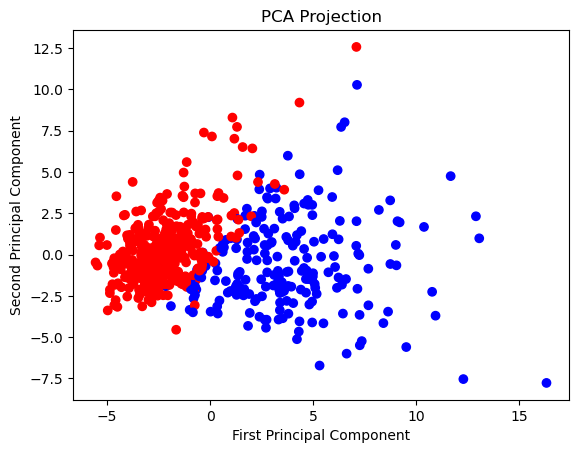

In [33]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')

plt.show()

In [11]:
# Visualizar los dos primeros componentes principales
print('Primer componente principal:', pca.components_[0])
print('Segundo componente principal:', pca.components_[1])

# Visualizar los eigenvalores de los dos primeros componentes principales
print('Eigenvalor del primer componente principal:', pca.explained_variance_[0])
print('Eigenvalor del segundo componente principal:', pca.explained_variance_[1])

Primer componente principal: [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
Segundo componente principal: [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
Eigenvalor del primer componente principal: 13.304990794374564
Eigenvalor del segundo componente principal: 5.7013746037261335


### Métodos de reducción de dimensiones (no supervisado):

## KPCA

In [12]:
from sklearn.decomposition import KernelPCA

In [13]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/100)
X_kpca = kpca.fit_transform(X_normalized)
print(X_kpca)

[[ 0.64242785  0.18549604]
 [ 0.30631396 -0.41560547]
 [ 0.64533348 -0.1294642 ]
 ...
 [ 0.16374648 -0.25497195]
 [ 0.70907121  0.16515992]
 [-0.37057486  0.00159553]]


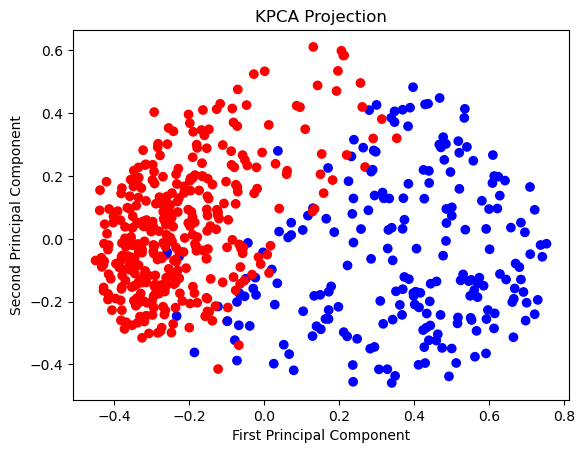

In [32]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KPCA Projection')
plt.show()

# ISOMAP

In [15]:
from sklearn.manifold import Isomap

In [16]:
isomap = Isomap(n_components=2)

isomap.fit(X_normalized)

X_isomap = isomap.transform(X_normalized)

print(X_isomap)

[[18.68631676 -1.11216213]
 [ 7.61830864 -4.43248499]
 [12.75025732 -2.86735301]
 ...
 [ 1.74619448 -3.6403823 ]
 [17.24982371  1.37031912]
 [-8.82185652 -5.10804389]]


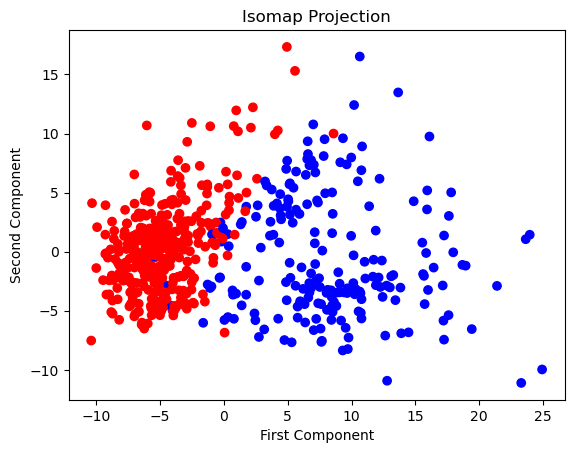

In [17]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Isomap Projection')

plt.show()

### Métodos de reducción de dimensiones (supervisado):

# PLS

In [26]:
from sklearn.cross_decomposition import PLSRegression

In [34]:
# Linear Discriminant Analysis (LDA)
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_normalized, y)[0]

# print the transformed data
print("LDA transformed data:")
print(X_pls)

LDA transformed data:
[[ 8.58231845  2.63041941]
 [ 2.89579184 -2.14615361]
 [ 5.80534387 -0.50808951]
 ...
 [ 1.52247787 -1.16266418]
 [10.19611015 -0.04309317]
 [-5.27294149 -0.72193978]]


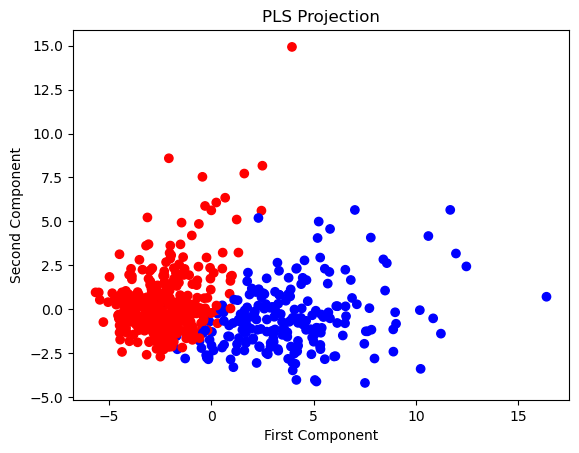

In [35]:


colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PLS Projection')

plt.show()

# UMAP

In [36]:
import umap

C:\Users\pedro\anaconda3\envs\Tarea6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X_normalized, y)

# print the transformed data
print("UMAP transformed data:")
print(X_umap)

UMAP transformed data:
[[-4.4949245  -0.68290067]
 [-6.252736   -0.38400877]
 [-4.9515305  -0.66784626]
 ...
 [-6.8093114   0.22975391]
 [-4.439787   -0.69050527]
 [20.873974   14.156396  ]]


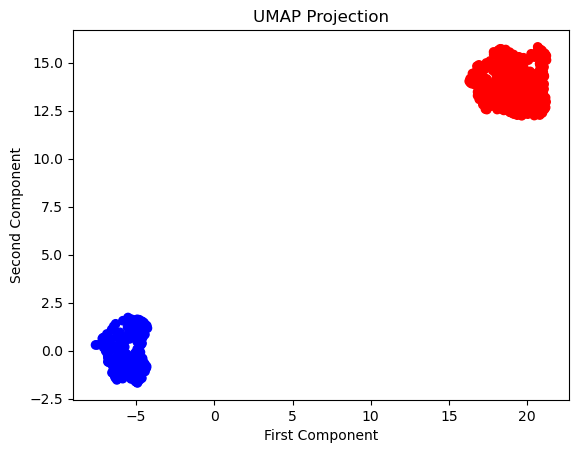

In [40]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('UMAP Projection')

plt.show()

# PaCMAP

In [41]:
import pacmap

In [42]:
# PaCMAP
reducer = pacmap.PaCMAP(n_components =2)
X_pacmap = reducer.fit_transform(X_normalized)

# print the transformed data
print("PaCMAP transformed data:")
print(X_pacmap)

PaCMAP transformed data:
[[  6.722604     3.2036593 ]
 [  9.069425    -0.6561906 ]
 [  7.578925     1.6716722 ]
 ...
 [-10.363315    -3.9195654 ]
 [  6.84761      3.082035  ]
 [ -8.7575865   -0.73250175]]


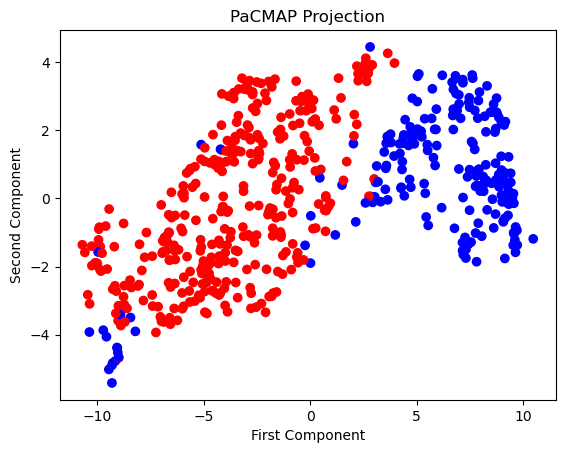

In [43]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PaCMAP Projection')

plt.show()

### Aglomeración 

In [ ]:
## Por hacer